In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [302]:
close = pd.read_csv('stocks-us-adjClose.csv')
high = pd.read_csv('stocks-us-adjHigh.csv')
low = pd.read_csv('stocks-us-adjLow.csv')
adjopen = pd.read_csv('stocks-us-adjOpen.csv')
volume = pd.read_csv('stocks-us-Volume.csv')

In [301]:
start_date = '1/1/2015'
end_date = '1/1/2016'

<h3> Clean data, drop null values, transpose columns and rows </h3>

In [244]:
def cleanify(data):
    
    data.iloc[:,0] = data.iloc[:,0].apply(lambda x: datetime.datetime
                                          .strptime(x, '%Y-%m-%d'))
    data = data[(data.iloc[:,0] >= start_date) & (data.iloc[:,0] < end_date)]
    data = data.dropna(axis=1, how='all')
    data = data.dropna(axis=0, how='all')
    data = data.transpose()
    data = data.reset_index()
    new_header = data.iloc[0]
    data = data[1:]
    data.columns = new_header
    data.rename(columns={'compiled from Yahoo! Finance data by Matt Borthwick'
                        :'Symbol'}, inplace=True)
    return data

In [303]:
close = cleanify(close)
adjopen = cleanify(adjopen)

<h3> Set df values to daily % change </h3>

In [304]:
for x in close.columns:
    if x != close.columns[0]:
        close[x] = (close[x] - adjopen[x]) / adjopen[x] 
        
df = close

In [305]:
df.head()

,Symbol,2015-01-02 00:00:00,2015-01-05 00:00:00,2015-01-06 00:00:00,2015-01-07 00:00:00,2015-01-08 00:00:00,2015-01-09 00:00:00,2015-01-12 00:00:00,2015-01-13 00:00:00,2015-01-14 00:00:00,...,2015-12-17 00:00:00,2015-12-18 00:00:00,2015-12-21 00:00:00,2015-12-22 00:00:00,2015-12-23 00:00:00,2015-12-24 00:00:00,2015-12-28 00:00:00,2015-12-29 00:00:00,2015-12-30 00:00:00,2015-12-31 00:00:00
1,ED,0.00363084,-0.0080012,0.00501905,0.0119209,0.0032709,-0.00709961,-0.005648,-0.000598734,0.0171816,...,0.00077923,-0.0115571,-0.00188886,0.00378194,0.0137694,0.00185676,0.0102436,0.000768216,0.00168869,-0.0141127
2,DD,-0.0017606,-0.0242177,-0.00644702,0.0137389,0.0227803,-0.0268767,0.00310055,-0.0228457,0.00109785,...,-0.0189501,-0.0317654,0.000313494,0.00937058,0.0158461,0.00667076,0.00211065,0.0133473,-0.00251849,-0.00892856
3,CVX,0.00851031,-0.0259553,0.00148323,-0.0119908,0.0111732,-0.0175232,-0.0147949,-0.0254396,0.006783,...,-0.0316577,-0.00277593,-0.0128319,0.0129039,0.017462,-0.0202235,0.000553679,-0.00696483,-0.000111011,0.00648917
4,FL,-0.00691121,0.00449317,-0.0283777,0.0339691,0.000173912,-0.00881524,0.00531066,-0.0255736,-0.0087556,...,-0.0234935,0.00736559,-0.00358026,0.0285494,-0.0110701,-0.0230006,0.00865541,0.00167734,-0.0123194,0.0052509
5,CAT,0.00119865,-0.036746,-0.00928046,0.00503599,-0.00527025,-0.0125056,-0.00957488,-0.0149407,0.0139004,...,-0.0339386,0.00789478,-0.00533615,0.0326038,0.00431101,-0.0053047,-0.00781251,-0.000433383,0.000436902,-0.00715848


<h3> Merge S&P 500 data, filter symbols to 3 most common sectors </h3>

In [306]:
sp = pd.read_csv('sp500.csv')

df = pd.merge(sp, df, on='Symbol')

df['Sector'].value_counts()
df = df[(df['Sector'] == 'Consumer Discretionary') |
        (df['Sector'] == 'Information Technology') |
        (df['Sector'] == 'Financials')]

label = df['Symbol']
sector = df['Sector']
df = df.drop(['Symbol','Sector', 'Name'],1)

df = df.dropna(axis=0, how='any')

In [307]:
import sklearn
from sklearn.cluster import FeatureAgglomeration

#features = test.drop('DATE',1)
agglo = FeatureAgglomeration(n_clusters=10).fit_transform(df)

<h3> Consumer: Green, IT: Blue, Financials: Red </h3>

In [292]:
color=[]
for i in sector:
    if i == 'Consumer Discretionary':
        color.append('g')
    if i == 'Information Technology':
        color.append('b')
    if i == 'Financials':
        color.append('r')

<h3> 2015 data </h3>

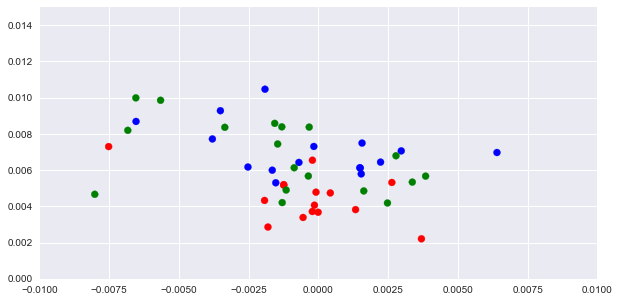

In [317]:
plt.figure(figsize=(10,5))
plt.ylim((0,.015))
plt.xlim((-.01,.01))
plt.scatter(agglo[:,0],agglo[:,1],c=color)
plt.show()

<h3> 2016 data </h3>

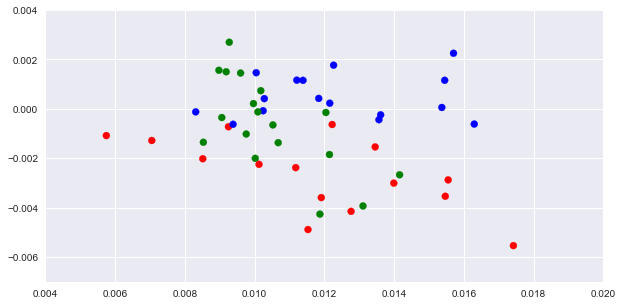

In [299]:
plt.figure(figsize=(10,5))
plt.ylim((-.007,.004))
plt.xlim((.004,.02))
plt.scatter(agglo[:,0],agglo[:,1],c=color)
plt.show()